## BackGround

Fast R-CNN : ROI Pooling을 사용하여 Box Regression과 Classification 수행

Faster R-CNN : 나온 추출 데이터를 가지고 RPN(Region Proposal Network)를 수행하고 나온 추출 데이터와 RPN 추출 데이터를 ROI Pooling에 넣어서 Bbox Regression과 Classification을 수행한다.



<img src = 'https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fc0pdEg%2FbtqBL8vzmxg%2F1zkQAmbSKShCvdqXx8jXkk%2Fimg.png'>

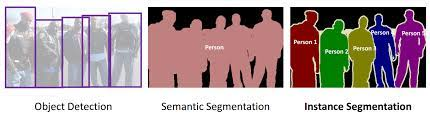